In [2]:
from EDA import *
from Data_Preprocessing import *
from Models import *
from Evaluation import *
from plot_prediction import *

# Data Preprocessing

In [3]:
df = load_data('Dataset/Tasla_Stock_Updated_V2.csv')

In [4]:
df_train, df_test = split_data(df)

In [5]:
df_train=create_features(df_train)
df_test=create_features(df_test)

In [6]:
df_full = create_features(df)


In [ ]:
features_to_scale = ['Low','High','Open','Close','Volume' ,'Monthly_Return', 'MA5', 'MA10', 'MA20','Volatility_5','Volatility_10','Volatility_20','Target']
df_train_scaled, df_test_scaled, fitted_scaler = scale_features(df_train, df_test, features_to_scale)
print("example of scaled data")
print(df_test_scaled.head())

# EDA

In [ ]:
plot_monthly_return_distribution(df_full) # distribution of monthly returns
plot_stock_price_trend(df_full) 
plot_moving_averages(df_full) 

plot_weekly_avg_return(df_full) # weekly average return seasonality
plot_quarterly_seasonality(df_full) # quarterly seasonality

plot_volatility(df_full) #volatility over time
plot_correlation_heatmap(df_full) #correlation heatmap between features
plot_volume_vs_price(df_full) # volume vs price movement

plot_zscore_outliers(df_full) # z-score outliers
plot_iqr_outliers(df_full) 

calculate_sharpe_ratio(df_full)
plot_cumulative_returns(df_full)



In [ ]:
import sys
print(sys.executable)
print(sys.version)


# Model Tranining and Testing

In [ ]:
results_normal_training = []

## SMA

In [ ]:
# Apply Simple Moving Average (SMA) to the test set
df_test_scaled['SMA_Prediction'] = simple_moving_average_model(df_test_scaled, window=5)

df_test_scaled.dropna(inplace=True)

mae, mse, rmse, r2, mape=evaluate_model(df_test_scaled['Close'], df_test_scaled['SMA_Prediction'])
results_normal_training.append({
    'Model': 'Simple Moving Average',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

plot_simple_moving_average(df_test_scaled)

## Linear Regression

In [ ]:
y_test, y_pred = linear_regression_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred) 

results_normal_training.append({
    'Model': 'Linear Regression',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
}) 

In [ ]:
volatility_period_metrics = []

In [ ]:
plot_test_train_prediction("Linear Regression",df_train_scaled, df_test_scaled, y_pred)

In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test, df_test_scaled, y_pred)

volatility_period_metrics.append(("Linear Regression", mae_volatility, rmse_volatility))

## XGBoost

In [ ]:
y_test, y_pred= xgboost_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred)

results_normal_training.append({
    'Model': 'XGBoost',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("XGBoost",df_train_scaled, df_test_scaled, y_pred)

In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test, df_test_scaled, y_pred)

volatility_period_metrics.append(("XgBoost", mae_volatility, rmse_volatility))

## RandomForestRegressor

In [ ]:
y_test, y_pred = random_forest_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred) 

results_normal_training.append({
    'Model': 'Random Forest',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("Random Forest Regressor",df_train_scaled, df_test_scaled, y_pred)

In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test, df_test_scaled, y_pred)

volatility_period_metrics.append(("Random forest regressor", mae_volatility, rmse_volatility))

## SVR

In [ ]:
y_test, y_pred = svr_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred) 

results_normal_training.append({
    'Model': 'Support Vector Regressor',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("Support Vector Regressor",df_train_scaled, df_test_scaled, y_pred)

In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test, df_test_scaled, y_pred)

volatility_period_metrics.append(("SVR", mae_volatility, rmse_volatility))

## DT regressor

In [ ]:
y_test, y_pred = decision_tree_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred) 

results_normal_training.append({
    'Model': 'Decision Tree',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("Decision Tree Regressor",df_train_scaled, df_test_scaled, y_pred)

In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test, df_test_scaled, y_pred)

volatility_period_metrics.append(("DT regressor", mae_volatility, rmse_volatility))

## Voting Ensemble Model

In [ ]:
y_test, y_pred = voting_model(df_train_scaled, df_test_scaled)
mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred)

results_normal_training.append({
    'Model': 'Voting Ensemble',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("Voting Ensemble",df_train_scaled, df_test_scaled, y_pred)

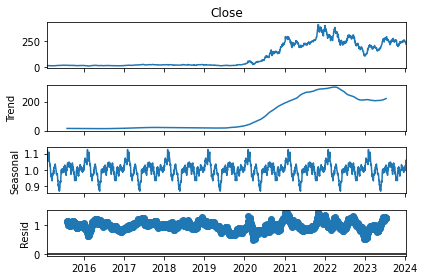

ADF Statistic: -1.220517
Critical Values @ 0.05: -2.86
p-value: 0.664708


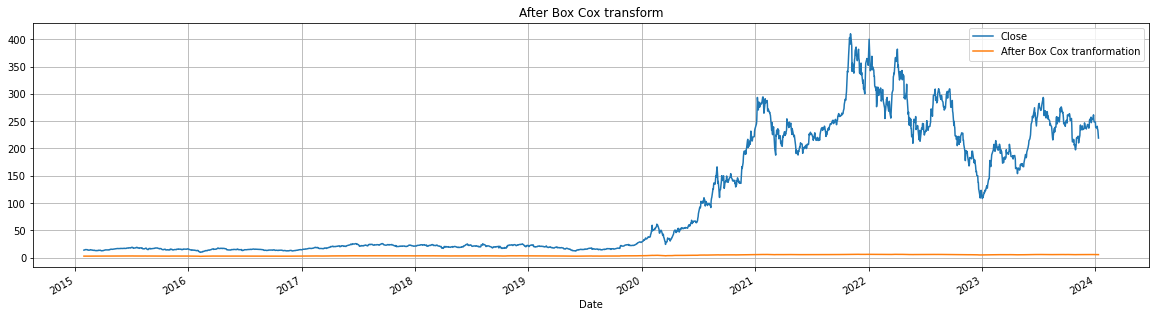

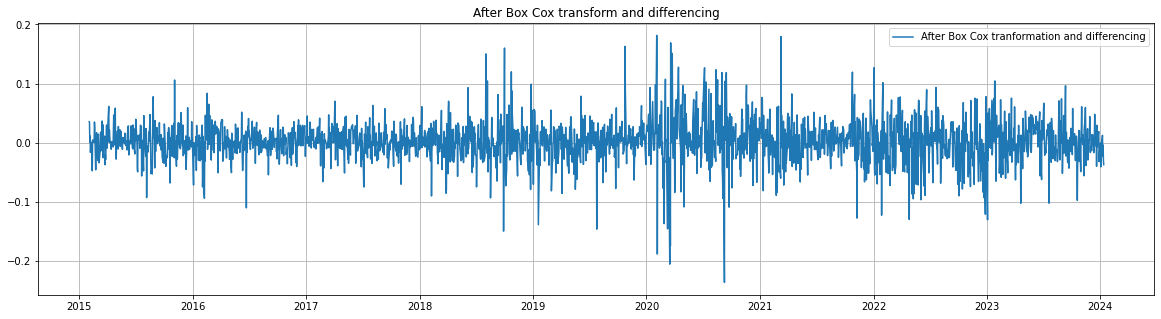

ADF Statistic: -32.394633
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [4]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 20, 10
decomposition = sm.tsa.seasonal_decompose(df_full.Close, model='multiplicative',period=252) # additive seasonal index
fig = decomposition.plot()
plt.show()

train_len = int(len(df_full) * 0.83) # 80% of the data for training
train = df_full[0:train_len] 
test = df_full[train_len:] 

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_full['Close'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])


from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(df_full['Close'], lmbda=0), index = df_full.index)

df_full['Close'].plot(figsize=(20, 5))
plt.grid()
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), df_full.index)
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

data_boxcox_diff.dropna(inplace=True)

adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]




## Prophet

10:57:22 - cmdstanpy - INFO - Chain [1] start processing
10:57:22 - cmdstanpy - INFO - Chain [1] done processing


MAE: 17.60654106990491
RMSE: 28.595508546257566
R² Score: 0.9338286864837042


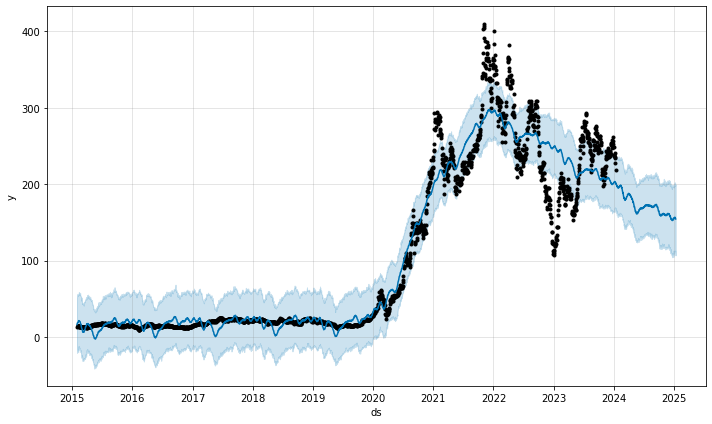

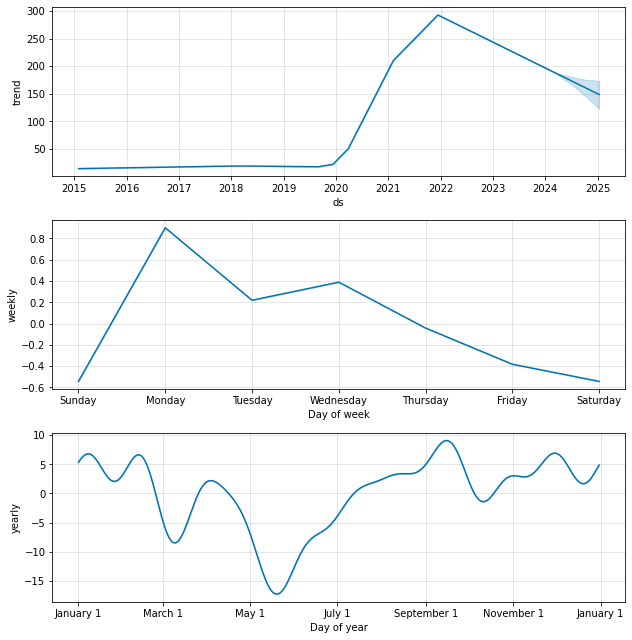

In [ ]:
# Python
import pandas as pd
from prophet import Prophet

df_prophet = df_full[['Close']].copy()        # Copy just the 'Close' column
df_prophet.reset_index(inplace=True)       # Bring 'Date' index back as a column
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Create train-test split (80% train, 20% test)
train_size = int(len(df_prophet) * 0.8)
df_train = df_prophet[:train_size]
df_test = df_prophet[train_size:]

m = Prophet()
m.fit(df_train)

future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat']].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)


from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

# 1. Merge actual and predicted values on 'ds'
# Ensure 'df_prophet' contains the original actual values
df_actual = df_prophet[['ds', 'y']]
df_predicted = forecast[['ds', 'yhat']]

# 2. Merge on date ('ds')
df_compare = pd.merge(df_actual, df_predicted, on='ds', how='inner')

# 3. Calculate errors (you can choose any metric you want)
mae = mean_absolute_error(df_compare['y'], df_compare['yhat'])
rmse = np.sqrt(mean_squared_error(df_compare['y'], df_compare['yhat']))
r2 = r2_score(df_compare['y'], df_compare['yhat'])

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")



## LSTM

In [ ]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU')


In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Disable GPU


In [ ]:
from Models import *

In [ ]:
y_test, y_pred = lstm_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred) 

results_normal_training.append({
    'Model': 'LSTM',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("LSTM",df_train_scaled, df_test_scaled[5:], y_pred)



In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test[5:], df_test_scaled[5:], y_pred)

volatility_period_metrics.append(("LSTM", mae_volatility, rmse_volatility))

## GRU Model

In [ ]:
y_test, y_pred = gru_model(df_train_scaled, df_test_scaled)

mae, mse, rmse, r2, mape=evaluate_model(y_test, y_pred)

results_normal_training.append({
    'Model': 'GRU',
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'R2': r2,
    'MAPE': mape
})

In [ ]:
plot_test_train_prediction("GRU",df_train_scaled, df_test_scaled[5:], y_pred)

In [ ]:
mae_volatility,rmse_volatility=volatility_error_plot(df_test[5:], df_test_scaled[5:], y_pred)

volatility_period_metrics.append(("GRU", mae_volatility, rmse_volatility))

In [ ]:
# Separate model names, MAE, and RMSE values
models = [model for model, _, _ in volatility_period_metrics]
mae_values = [mae for _, mae, _ in volatility_period_metrics]
rmse_values = [rmse for _, _, rmse in volatility_period_metrics]

# Plot comparison of MAE and RMSE for different models
x = np.arange(len(models))  # Model index

fig, ax = plt.subplots(figsize=(20, 16))
width = 0.35  # Bar width

# Plotting both MAE and RMSE side by side
bar1 = ax.bar(x - width/2, mae_values, width, label='MAE')
bar2 = ax.bar(x + width/2, rmse_values, width, label='RMSE')

ax.set_xlabel('Models')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance During High Volatility Periods')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


In [ ]:
feature_cols = ['Low', 'High', 'Open', 'Close', 'Volume', 'Monthly_Return', 'MA5', 'MA10', 'MA20']

# List of models with their names
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("Support Vector Regressor", SVR(kernel='rbf', C=100, epsilon=0.1)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("XGBoost", xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)),
    ("Voting Ensemble", VotingRegressor(estimators=[
        ('lr', LinearRegression()),
        ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
        ('svr', SVR(kernel='rbf', C=100, epsilon=0.1)),
        ('dt', DecisionTreeRegressor(random_state=42)),
        ('xgb', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42))
    ]))
]

results_walk_forward_training = []

for name,model_instance in models:
    print(f"Running Walk-Forward Validation for: {name}")
    y_true, y_pred = walk_forward_validation(df_test_scaled, 
                                         model_func=lambda m=model_instance: m, 
                                         feature_cols=feature_cols,
                                         start=100)
    # Evaluate model performance
    mae, mse, rmse, r2, mape=evaluate_model(y_true, y_pred)
    results_walk_forward_training.append({
        'Model': name,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'MAPE': mape
    })


In [ ]:
plot_model_comparsion(results_normal_training)
plot_model_comparsion(results_walk_forward_training)